##### GLDADec (Our Proposed) deconvolution on GSE65133
- We downloaded the processed data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE65133.
- 20 samples derived from human PBMCs.
- Corresponding to Fig. 2A.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = '/workspace/github/GLDADec' # cloning repository
import sys
sys.path.append(BASE_DIR)

from run import pipeline

***
#### Load data

In [2]:
raw_df = pd.read_csv(BASE_DIR+'/data/GSE65133/GSE65133_expression.csv',index_col=0)
domain_dic = pd.read_pickle(BASE_DIR+'/data/marker/human_blood_domain.pkl')
random_sets = pd.read_pickle(BASE_DIR+'/data/random_info/100_random_sets.pkl')
target_facs = pd.read_csv(BASE_DIR+'/data/GSE65133/facs.csv',index_col=0)/100

***
#### Conduct GLDADec
- We added 100 genes with large coefficients of variation between samples.
- The cell types to be evaluated are as follows:
    1. 'Naive B'
    2. 'Memory B'
    3. 'Naive CD4 T'
    4. 'Memory CD4 T'
    5. 'CD8 T'
    6. 'NK'
    7. 'Monocytes'
    8. 'Gamma delta T'

  0%|          | 0/10 [00:00<?, ?it/s]

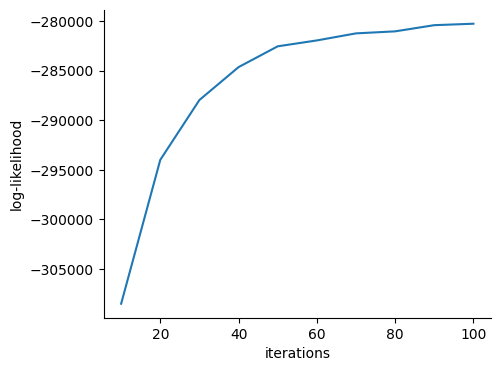

cells in res : ['Monocytes', 'NK cells', 'B cells naive', 'B cells memory', 'T cells CD4 naive', 'T cells CD4 memory', 'T cells CD8', 'T cells gamma delta']
cells in ref : ['Naive B', 'Memory B', 'CD8 T', 'Naive CD4 T', 'Resting memory CD4 T', 'Activated memory CD4 T', 'Gamma delta T', 'NK', 'Monocytes']


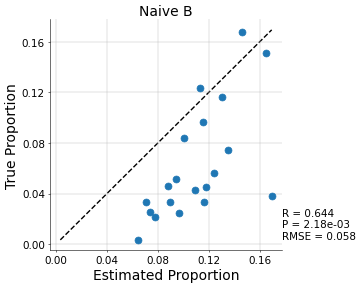

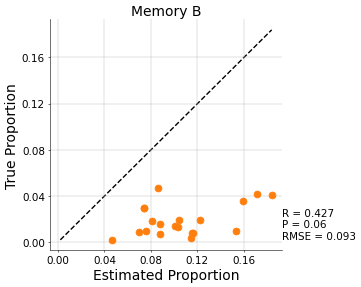

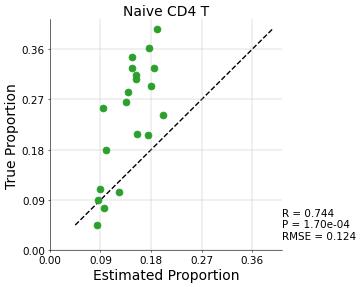

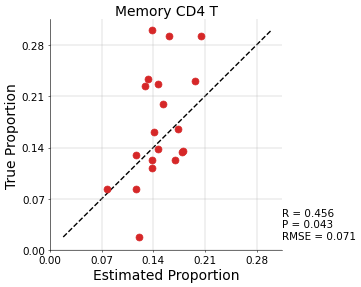

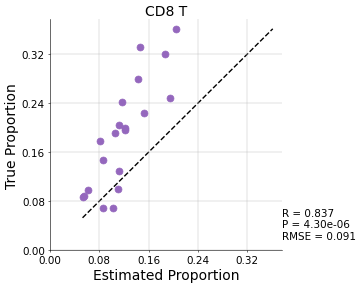

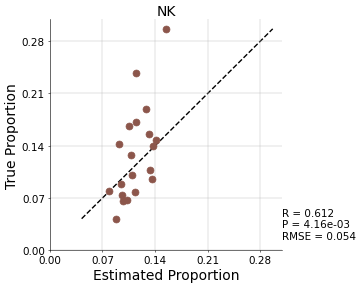

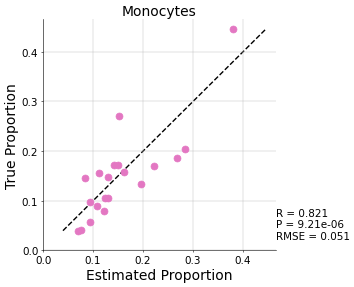

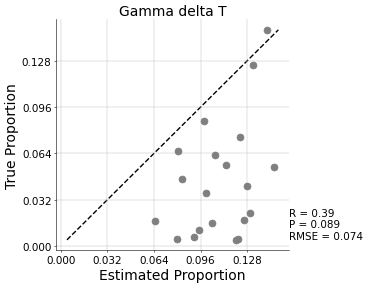

{'CD8 T': [('R', 0.8366), ('P', '4.30e-06'), ('RMSE', 0.0909)],
 'Gamma delta T': [('R', 0.3902), ('P', 0.089), ('RMSE', 0.0739)],
 'Memory B': [('R', 0.4274), ('P', 0.06), ('RMSE', 0.093)],
 'Memory CD4 T': [('R', 0.4558), ('P', 0.043), ('RMSE', 0.0706)],
 'Monocytes': [('R', 0.8209), ('P', '9.21e-06'), ('RMSE', 0.051)],
 'NK': [('R', 0.6117), ('P', '4.16e-03'), ('RMSE', 0.0535)],
 'Naive B': [('R', 0.6441), ('P', '2.18e-03'), ('RMSE', 0.0576)],
 'Naive CD4 T': [('R', 0.7438), ('P', '1.70e-04'), ('RMSE', 0.1244)]}


In [3]:
# single run and eval
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=[],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False,remove_noise=False)
pp.gene_selection(method='CV',outlier=True,topn=100)
pp.add_marker_genes(target_cells=['Monocytes', 'NK cells', 'B cells naive', 'B cells memory', 'T cells CD4 naive', 'T cells CD4 memory', 'T cells CD8', 'T cells gamma delta'],add_dic=domain_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=10,minmax=False,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=True,var_plot=False)

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Monocytes', 'NK cells', 'B cells naive', 'B cells memory', 'T cells CD4 naive', 'T cells CD4 memory', 'T cells CD8', 'T cells gamma delta'],
            facs_norm_range=[],
            res_names=[['B cells naive'],['B cells memory'],['T cells CD4 naive'],['T cells CD4 memory'],['T cells CD8'],['NK cells'],['Monocytes'],['T cells gamma delta']],
            ref_names=[['Naive B'],['Memory B'],['Naive CD4 T'],['Resting memory CD4 T', 'Activated memory CD4 T'],['CD8 T'],['NK'],['Monocytes'],['Gamma delta T']],
            title_list = ['Naive B','Memory B','Naive CD4 T','Memory CD4 T','CD8 T','NK','Monocytes','Gamma delta T'], figsize=(6,6),dpi=50,plot_size=100,multi=False)

In [4]:
res = pp.merge_total_res[0]
display(res)
#res.to_csv(BASE_DIR+'/baselines_eval/Proposed/Proposed_GSE65133_Results.csv')

,Monocytes,NK cells,B cells naive,B cells memory,T cells CD4 naive,T cells CD4 memory,T cells CD8,T cells gamma delta
"PBMCs, 17-002",0.149616,0.102302,0.113044,0.074681,0.091049,0.168286,0.158311,0.142711
"PBMCs, 17-006",0.093187,0.092604,0.092604,0.081539,0.149388,0.171810,0.195106,0.123762
"PBMCs, 17-019",0.121878,0.152170,0.166341,0.187067,0.084677,0.076529,0.081134,0.130204
"PBMCs, 17-023",0.225005,0.111609,0.145031,0.073711,0.099374,0.195164,0.061476,0.088631
"PBMCs, 17-026",0.194595,0.077415,0.097754,0.088950,0.085915,0.193684,0.149362,0.112326
"PBMCs, 17-027",0.125703,0.088531,0.136219,0.172657,0.100514,0.142333,0.113965,0.120078
"PBMCs, 17-030",0.161973,0.130209,0.071188,0.160621,0.097094,0.118946,0.120748,0.139220
"PBMCs, 17-034",0.267887,0.135780,0.138401,0.071299,0.146002,0.113500,0.064746,0.062387
"PBMCs, 17-040",0.148364,0.108061,0.123540,0.105141,0.180197,0.139895,0.103388,0.091414
"PBMCs, 17-041",0.108903,0.141169,0.126765,0.102853,0.192450,0.122443,0.088736,0.116681
